# Reading and Visualising Data with Pandas

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/Asterics2020-Obelics](https://github.com/Asterics2020-Obelics/School2017/tree/master/pandas)

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print("Python version: {0}\n"
      "Pandas version: {1}\n"
      "Matplotlib version: {2}\n"
      "seaborn version: {3}"
      .format(sys.version, pd.__version__, ml.__version__, sns.__version__))

Python version: 3.6.5 (default, Jun  1 2018, 14:48:24) 
[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
Pandas version: 0.23.0
Matplotlib version: 2.2.2
seaborn version: 0.8.1


In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

In [3]:
import warnings
warnings.filterwarnings('ignore')  # annoying UserWarnings from Jupyter/seaborn which are not fixed yet

## Exercise 1

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/neutrinos.csv`.

In [4]:
%shorterr neutrinos = pd.read_csv('data/neutrinos.csv')

SyntaxError: invalid syntax (<string>, line 1)


### Problems encountered

- the first few lines represent a plain header and need to be skipped
- comments are indicated with `$` at the beginning of the line
- the column separator is `:`
- the decimal delimiter is `,`
- the index column is the first one
- there is a footer to be excluded
- footer exclusion only works with the Python-engine

### Solution to exercise 1

In [5]:
!head -n 15 data/neutrinos.csv

Provided by Moritz Lotze, unformatted by Tamas Gal for teaching purposes,
Moritz would never hand out such a mess ;)

Have fun!

$ Column names
:azimuth:zenith:bjorkeny:energy:pos_x:pos_y:pos_z:proba_track:proba_cscd

$ Data
0:2,3495370211373316:1,1160038417256017:0,04899799823760986:3,3664000034332275:52,74:28,831:401,18600000000004:0,8243512974051896:0,17564870259481039
1:5,575785663044353:1,7428377336692398:0,28047099709510803:3,890000104904175:48,369:29,865:417,282:0,8183632734530938:0,18163672654690619
2:4,656124692722159:2,686909147834136:0,1198429986834526:3,2335000038146973:71,722:121,449:363,077:0,8283433133732535:0,17165668662674652
3:0,5204858401306308:1,939325715443025:0,06131500005722046:4,783999919891357:-47,592:-84,466:350,687:0,8423153692614771:0,15768463073852296
4:2,8569704309044184:1,6788966833786627:0,06146499887108803:3,983299970626831:-25,518:24,362:391,891:0,8622754491017964:0,1377245508982036
5:5,519597420755324:2,2190143556767175:0,15195700526237488:4,667799949

In [6]:
neutrinos = pd.read_csv('data/neutrinos.csv',
                        skiprows=5,
                        comment='$',
                        sep=':',
                        decimal=',',
                        index_col=0,
                        skipfooter=1,
                        engine='python')

In [7]:
neutrinos.head(3)

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
0,2.349537,1.116004,0.04899799823760986,3.3664,52.740,28.831,401.186,0.824351,0.175649
1,5.575786,1.742838,0.28047099709510803,3.8900,48.369,29.865,417.282,0.818363,0.181637
2,4.656125,2.686909,0.1198429986834526,3.2335,71.722,121.449,363.077,0.828343,0.171657


### Check the dtypes to make sure everthing is parsed correctly (and is not an `object`-array)

In [8]:
neutrinos.dtypes

azimuth        float64
zenith         float64
bjorkeny        object
energy         float64
pos_x          float64
pos_y          float64
pos_z          float64
proba_track    float64
proba_cscd     float64
dtype: object

`bjorkeny` is still a problem, since its type could not be inferred by `numpy`!

In [9]:
%shorterr neutrinos.bjorkeny.astype(float)  # this reveals that we still have `,` as separator

ValueError: could not convert string to float: '9,899999713525176e-05'


In [10]:
sum(',' in b for b in neutrinos.bjorkeny)  # two values have `,` in them

2

In [11]:
bjorkeny_with_comma_mask = neutrinos.bjorkeny.str.contains(',');  # a boolean mask which marks our two bad guys
neutrinos[bjorkeny_with_comma_mask]

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
25958,2.309464,1.575072,"4,999999873689376e-05",30.391001,44.431,-10.498,436.929,1.0,0.0
29803,4.011943,2.467239,"9,899999713525176e-05",31.641001,56.129,-87.262,396.509,1.0,0.0


In [12]:
neutrinos.bjorkeny = neutrinos.bjorkeny.str.replace(',', '.').astype(float)

In [13]:
neutrinos.dtypes  # everything's ok now ;)

azimuth        float64
zenith         float64
bjorkeny       float64
energy         float64
pos_x          float64
pos_y          float64
pos_z          float64
proba_track    float64
proba_cscd     float64
dtype: object

## Exercise 2

Create a histogram of the neutrino energies.

### Solution to exercise 2

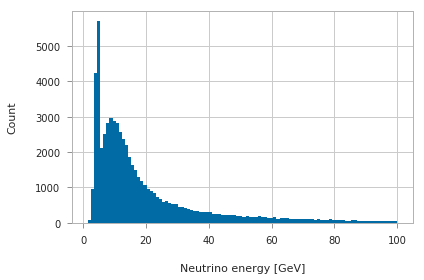

In [14]:
neutrinos.energy.hist(bins=100)
plt.xlabel('Neutrino energy [GeV]');
plt.ylabel('Count');

## Exercise 3

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/reco.csv`.

### Problems encountered

- need to define index column

### Solution to exercise 3

In [15]:
reco = pd.read_csv('data/reco.csv', index_col=0)
reco.head()

,zenith,azimuth,energy_muon,energy_neutrino,bjorken_y,quality,pos_x,pos_y,pos_z
0,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818


## Exercise 4

Combine the `neutrinos` and `reco` `DataFrames`  using `pd.concat()`

### Problems encountered

- need to define the right axis
- identical column names should be avoided

### Solution to exercise 4

In [16]:
data = pd.concat([neutrinos, reco.add_prefix('reco_')], axis=1)

In [17]:
data.head(3)

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.048998,3.3664,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.280471,3.8900,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,4.656125,2.686909,0.119843,3.2335,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437


In [18]:
data.columns

Index(['azimuth', 'zenith', 'bjorkeny', 'energy', 'pos_x', 'pos_y', 'pos_z',
       'proba_track', 'proba_cscd', 'reco_zenith', 'reco_azimuth',
       'reco_energy_muon', 'reco_energy_neutrino', 'reco_bjorken_y',
       'reco_quality', 'reco_pos_x', 'reco_pos_y', 'reco_pos_z'],
      dtype='object')

## Exercise 5

Make a scatter plot to visualise the zenith reconstruction quality.

`data = pd.concat([neutrinos reco.add_prefix('reco_')], axis=1)`

### Problems encountered

- `DataFrame.plot()` is not suited to do scatter plots (inverts axis, sets weird limits etc.)

#### Sometimes it's better not to fight against `DataFrame.plot()`, just switch to Matplotlib ;)

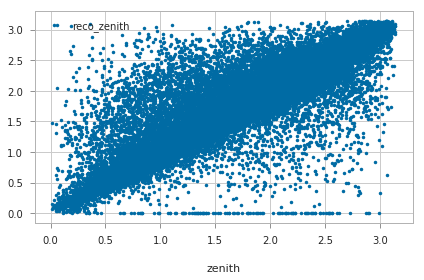

In [19]:
data.plot(x='zenith', y='reco_zenith', style='.');  # Yay!

### Solution to exercise 5, using `plt.scatter()`

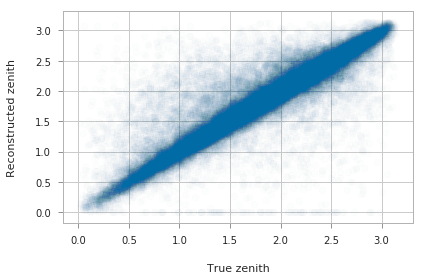

In [20]:
plt.scatter(data['zenith'], data['reco_zenith'], alpha=0.01);
plt.xlabel('True zenith');
plt.ylabel('Reconstructed zenith');

### Solution to exercise 5, using `plt.hist2d()`

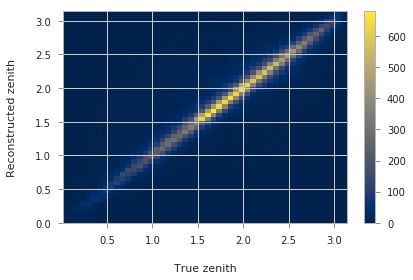

In [21]:
plt.hist2d(data['zenith'], data['reco_zenith'], bins=50);
plt.xlabel('True zenith');
plt.ylabel('Reconstructed zenith');
plt.colorbar();

## Exercise 6

Create a histogram of the cascade probabilities (__`neutrinos`__ dataset: `proba_cscd` column) for the energy ranges 1-5 GeV, 5-10 GeV, 10-20 GeV and 20-100 GeV.

### Solution to exercise 6

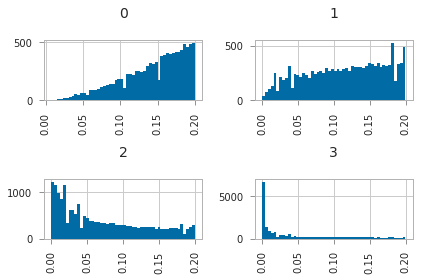

In [22]:
ebins = [1, 5, 10, 20, 100]
neutrinos['ebin'] = pd.cut(neutrinos.energy, ebins, labels=False)
neutrinos.hist('proba_cscd', by='ebin', bins=50);

## Exercise 7

Create a 2D histogram showing the distribution of the `x` and `y` values of the starting positions (`pos_x` and `pos_y`) of the neutrinos. This is basically a 2D plane of the starting positions.

### Solution to exercise 7

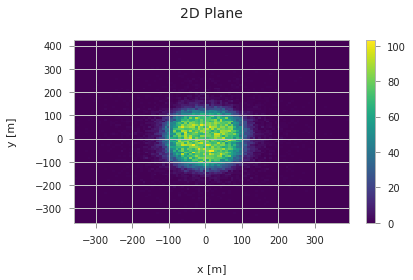

In [23]:
plt.hist2d(data.pos_x, data.pos_y, bins=100, cmap='viridis')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('2D Plane')
plt.colorbar();

## Exercise 8

Check out `sns.jointplot` and recreate the 2D histogram from Exercies 7.

### Solution to exercise 8

No handles with labels found to put in legend.


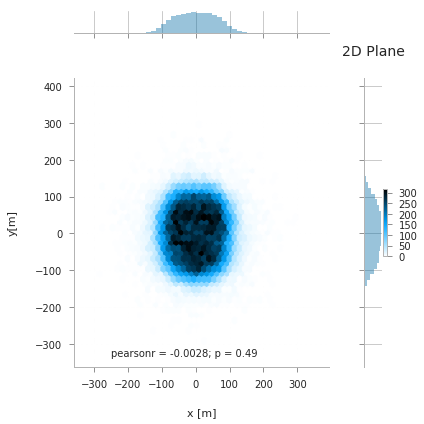

In [24]:
g = sns.jointplot('pos_x', 'pos_y', data=data, kind='hex')
g.set_axis_labels("x [m]", "y[m]")
plt.title("2D Plane")
plt.colorbar()
plt.legend();

## Exercise 9

Create two histograms of the `azimuth` and `zenith` distribution side by side, in one plot (two subplots).

Try `pandas` built-in matplotlib wrapper and also the raw matplotlib library.

In [25]:
data.head(2)

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.048998,3.3664,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.280471,3.8900,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107


### Solution to exercise 9

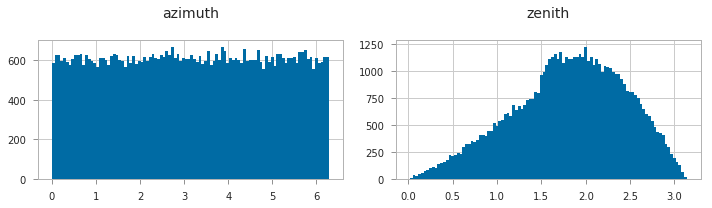

In [26]:
data.hist(['azimuth', 'zenith'], bins=100, figsize=(10, 3));

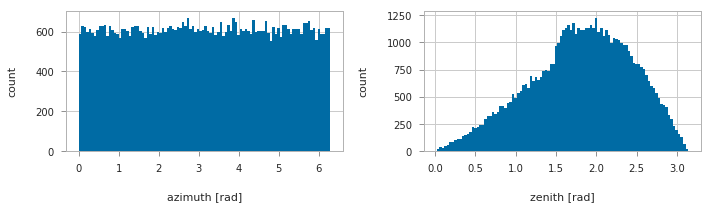

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

data.azimuth.hist(bins=100, ax=axes[0])  # zenith=0 is coming from above
axes[0].set_xlabel('azimuth [rad]')
axes[0].set_ylabel('count')

data.zenith.hist(bins=100, ax=axes[1])
axes[1].set_xlabel('zenith [rad]')
axes[1].set_ylabel('count');

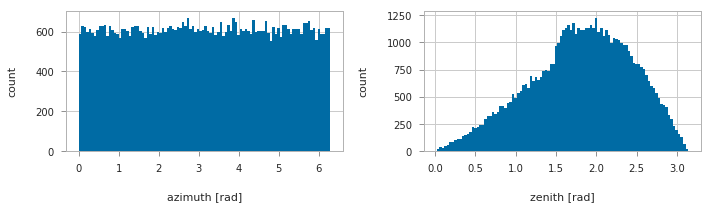

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

for idx, column in enumerate(['azimuth', 'zenith']):
    data[column].hist(bins=100, ax=axes[idx])  # zenith=0 is coming from above
    axes[idx].set_xlabel(column + ' [rad]')
    axes[idx].set_ylabel('count')

## Exercise 10

Split the data into two groups: `upgoing` and `downgoing`, based on the `zenith` value (`zenith == 0` is coming from above).

Try out `sns.stripplot` to verify your "cut" on the data!

### Solution to exercise 10

In [29]:
data['upgoing'] = data.zenith < np.pi/2

In [30]:
data_by_upgoing = data.groupby('upgoing')

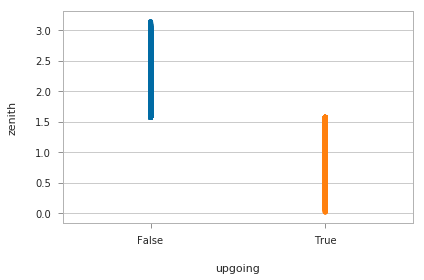

In [31]:
sns.stripplot(x="upgoing", y="zenith", data=data);

## Exercise 11

Create a combined histogram (two histograms overlayed in the same plot) for both `upgoing` and `downgoing` datasets, showing the `zenith` angle.

### Solution to exercise 11

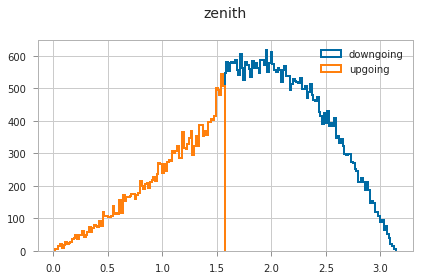

In [32]:
fig, ax = plt.subplots()

for upgoing, sub_data in data_by_upgoing:
    sub_data.hist('zenith', ax=ax, bins=100,
                  label='upgoing' if upgoing else 'downgoing',
                  histtype='step', linewidth=2)
plt.legend();

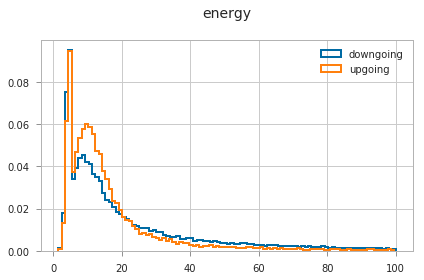

In [33]:
fig, ax = plt.subplots()

for upgoing, sub_data in data_by_upgoing:
    sub_data.hist('energy', ax=ax, normed=True, bins=100,
                  label='upgoing' if upgoing else 'downgoing',
                  histtype='step', linewidth=2)
plt.legend();

## Acknowledgements
![](images/eu_asterics.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).